# Naive Bayes Classifier - Explainable Machine Learning WS 23/24

<h2> 1. Einführung

### Bayes Classifier Intro

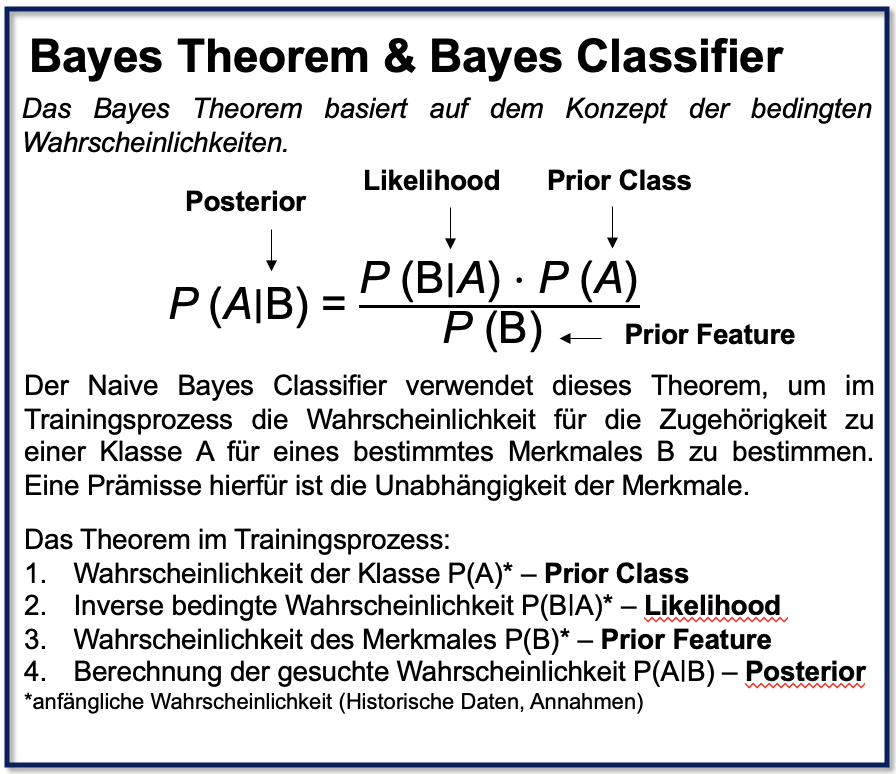

In [6]:
from IPython.display import Image

png_path = '/Users/fabian/Desktop/datasets/BayesIntro.png'

Image(filename=png_path, width=400, height=300)

### Gliederung

<html>
<ol>
 <li style="font-style: italic;">Einführung</li>
 <li style="font-style: italic;">Preprocessing</li>
 <li style="font-style: italic;">Building the Model</li>
<li style="font-style: italic;">Model Training</li>
<li style="font-style: italic;">Explainability</li>
<li style="font-style: italic;">Predictions and Evaluations</li>
<li style="font-style: italic;">Hyperparametertuning</li>
<li style="font-style: italic;">Principal Component Analysis</li>
</html>

### Poster

https://github.com/eva-f00/bayes_xml/blob/main/Bayes_Poster.pdf

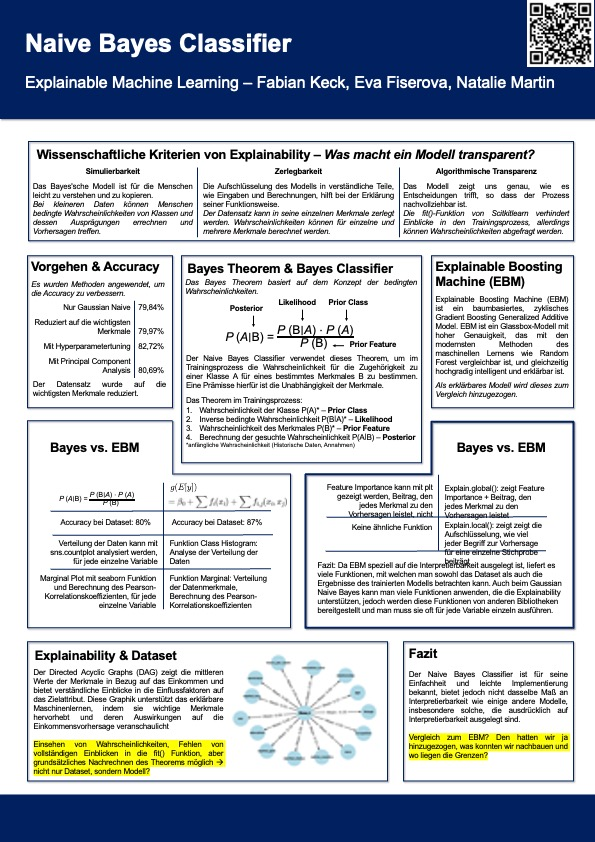

In [7]:
png_path = '/Users/fabian/Desktop/datasets/Bayes_Poster.jpg'

Image(filename=png_path)

<h2> 2. Imports, Loading Dataset & Analyze Data 

### Imports

In [8]:
#in the following code, a Gaussian Naive Bayes Classifier will be build to predict whether a person makes over 50K a year

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), Python data analysis library
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization; to explore the purpose and target column

# Machine Learning and data analysis

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

import scipy.stats as stats

### Loading the dataset

In [9]:
#import dataset as ds

#path = 'C:/Users/evafi/bayes_xml/dataset/adult_income_dataset.csv'
path = '/Users/fabian/Desktop/datasets/adult.csv'
#path = 'C:\\Users\\Natal\\Documents\\Wirtschaftsinformatik_Master\\2.Semester_WS2023-24\\Explainable Machine Learning\\Prüfungsleistung\\adult income dataset.csv'

data = pd.read_csv(path, sep=",")
data2 = data

#top 5 of each column
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<h2> Analyze the dataset

In [10]:
# shape dataset
#numer of rows and columns/ features
data.shape

(48842, 15)

In [11]:
#data analysis
n_records = data.shape[0]
n_greater_50k = data[data['income'] == '>50K'].shape[0]
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]
greater_percent = (n_greater_50k / n_records) * 100
print("Total numbber of records: {}".format(n_records))
print("Individuals making more than $50.000: {}".format(n_greater_50k))
print("Individuals making at most $50.000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50.000: {}%".format(greater_percent))

Total numbber of records: 48842
Individuals making more than $50.000: 11687
Individuals making at most $50.000: 37155
Percentage of individuals making more than $50.000: 23.928176569346054%


In [12]:
#rename column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data.columns = col_names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [13]:
# general inforamtion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [14]:
#Overview of the data
data.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<h2>2. Preprocessing the data

<h4> Check values in each variable and replace them / Dealing with missing values

In [15]:
#check "?" in dataset

col_n = data.columns
num_data = data.shape[0]
for c in col_n:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print(c)
        print(num_non)
        print("{0:.2f}%".format(float(num_non) / num_data * 100))

workclass
2799
5.73%
occupation
2809
5.75%
native_country
857
1.75%


In [16]:
# replace '?' values in workclass variable with `NaN`
data['workclass'].replace('?', np.NaN, inplace=True)

# replace '?' values in occupation variable with `NaN`
data['occupation'].replace('?', np.NaN, inplace=True)

# replace '?' values in native_country variable with `NaN`
data['native_country'].replace('?', np.NaN, inplace=True)

# impute missing categorical variables with most frequent value

# Fill missing values in 'workclass' column with mode
mode_workclass = data['workclass'].mode()[0]
data['workclass'].fillna(mode_workclass, inplace=True)

# Fill missing values in 'occupation' column with mode
mode_occupation = data['occupation'].mode()[0]
data['occupation'].fillna(mode_occupation, inplace=True)

# Fill missing values in 'native.country' column with mode
mode_native_country = data['native_country'].mode()[0]
data['native_country'].fillna(mode_native_country, inplace=True)

In [17]:
# Check for missing values again
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [18]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

data[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [19]:
# check missing values in categorical variables

data[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [20]:
# view frequency counts of values in categorical variables

for var in categorical: 
    print(data[var].value_counts())

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                550

<h4> Normalization

In [21]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

workclass  contains  8  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  41  labels
income  contains  2  labels


In [22]:
# get numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [23]:
# Convert columns with numerical data to numeric data type
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric)

In [24]:
data[numerical_cols]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [25]:
corrmat = data[numerical_cols].corr()
print(corrmat)

                     age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.076628       0.030940      0.077229      0.056944   
fnlwgt         -0.076628  1.000000      -0.038761     -0.003706     -0.004366   
education_num   0.030940 -0.038761       1.000000      0.125146      0.080972   
capital_gain    0.077229 -0.003706       0.125146      1.000000     -0.031441   
capital_loss    0.056944 -0.004366       0.080972     -0.031441      1.000000   
hours_per_week  0.071558 -0.013519       0.143689      0.082157      0.054467   

                hours_per_week  
age                   0.071558  
fnlwgt               -0.013519  
education_num         0.143689  
capital_gain          0.082157  
capital_loss          0.054467  
hours_per_week        1.000000  


Text(0.5, 1.0, 'Correlation Heatmap')

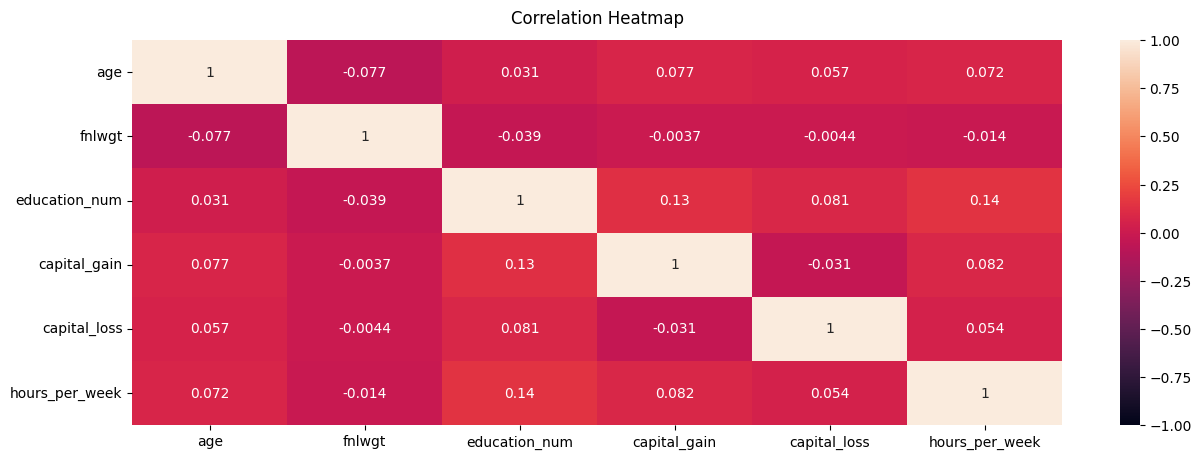

In [26]:
plt.figure(figsize=(15,5))
heatmap = sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [27]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

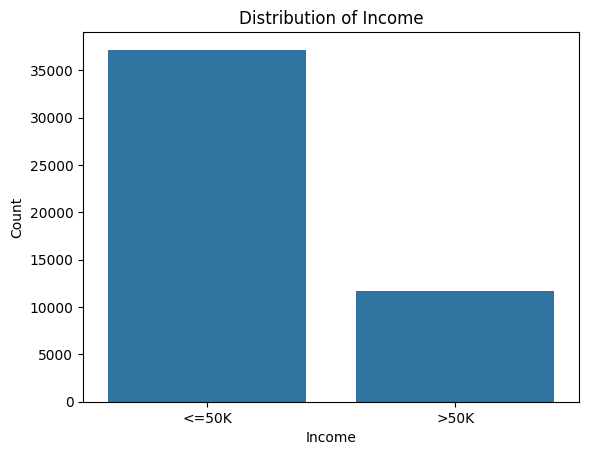

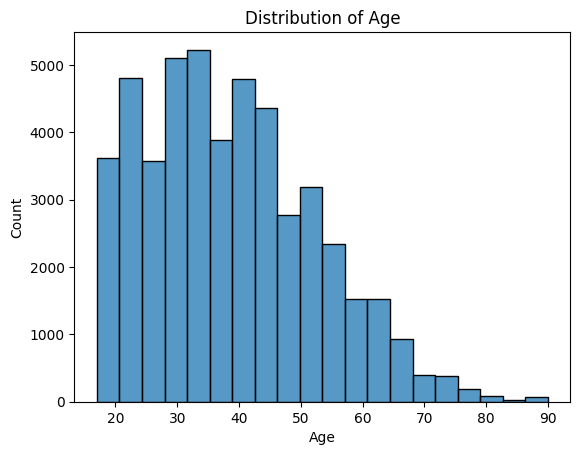

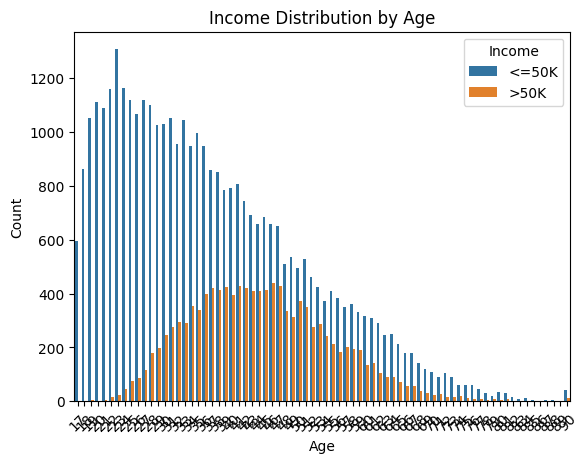

In [28]:
# Visualize the distribution of income
sns.countplot(x='income', data=data)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of age
sns.histplot(data['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualize the income distribution by age
sns.countplot(x='age', hue='income', data=data)
plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

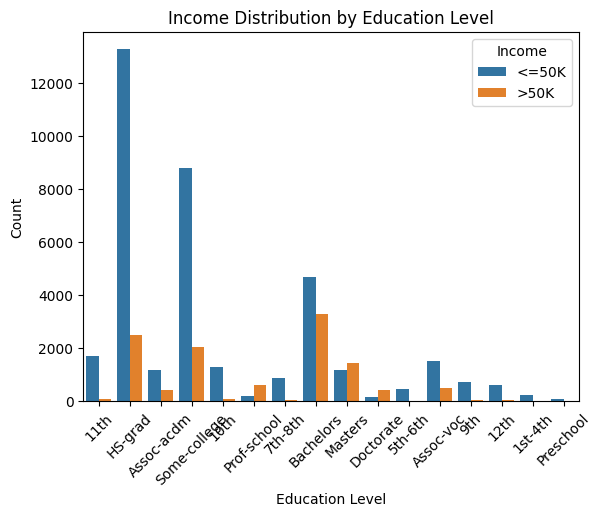

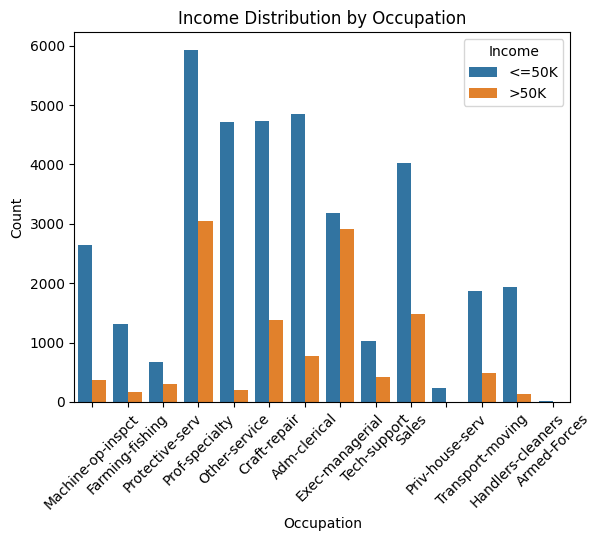

In [29]:
# Visualize the income distribution by education level
sns.countplot(x='education', hue='income', data=data)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

# Visualize the income distribution by occupation
sns.countplot(x='occupation', hue='income', data=data)
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

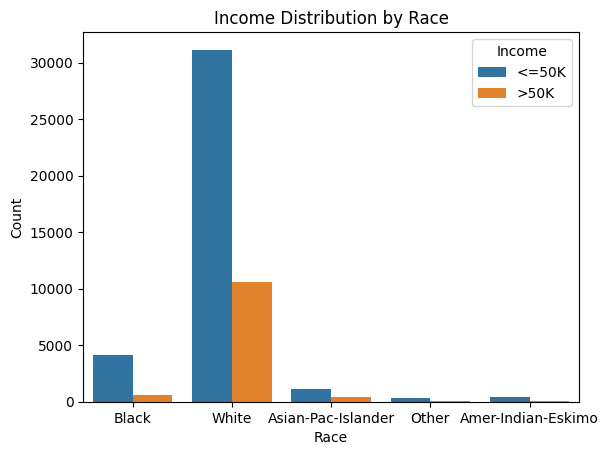

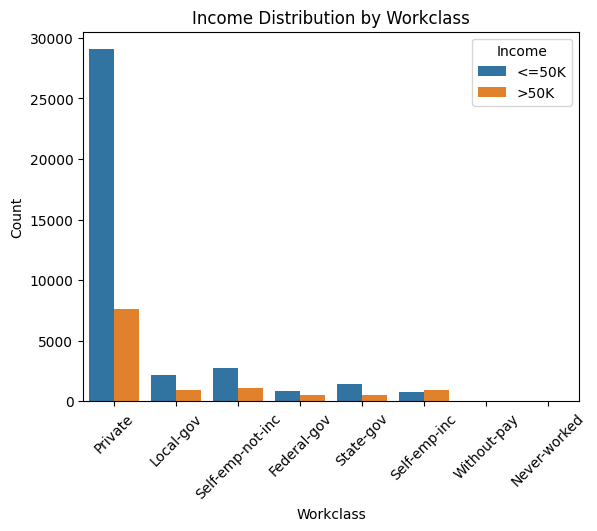

In [30]:
# Visualize the income distribution by race
sns.countplot(x='race', hue='income', data=data)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()


# Visualize the income distribution by workclass
sns.countplot(x='workclass', hue='income', data=data)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

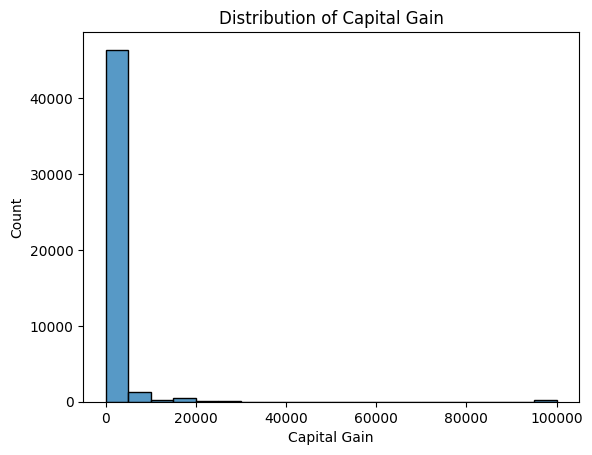

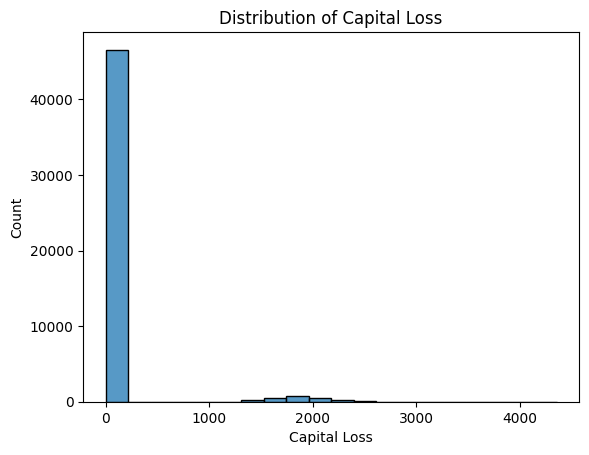

In [31]:
# Visualize the distribution of capital-gain
sns.histplot(data['capital_gain'], bins=20)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of capital-loss
sns.histplot(data['capital_loss'], bins=20)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

In [32]:
# Log-transform the skewed features
skewed = ['capital_gain', 'capital_loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

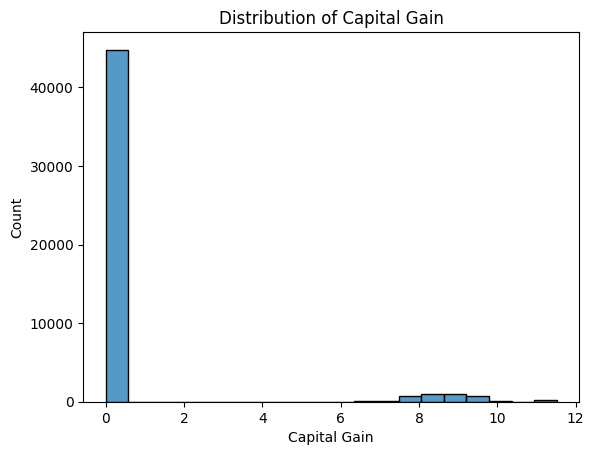

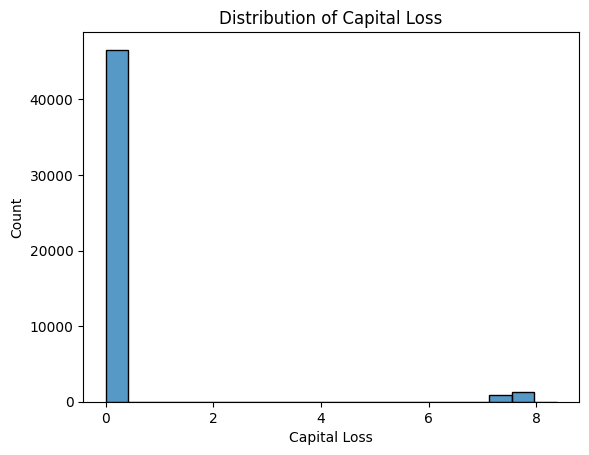

In [33]:
# Visualize the distribution of capital-gain after transformation
sns.histplot(features_log_transformed['capital_gain'], bins=20)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of capital-loss after transformation
sns.histplot(features_log_transformed['capital_loss'], bins=20)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

In [34]:
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

features_log_minmax_transform = pd.DataFrame(data)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_minmax_transform[numerical])
# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n=5))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.109589,Private,226802,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,89814,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,336951,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,160323,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
4,0.013699,Private,103497,Some-college,0.600000,Never-married,Prof-specialty,Own-child,White,Female,0.000000,0.0,0.295918,United-States,<=50K


In [35]:
#preprocessing categorial features

features_log_minmax_transform.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.109589,Private,226802,11th,0.4,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,0.397959,United-States,<=50K


In [36]:
# Transform Categorial into Numerical
# One-hot encode the 'features_log_minmax_transform' data 
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0,'>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# See the encoded feature names
print (encoded)

107 total features after one-hot encoding.
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-manage

<h2>3. Building the Model

<h4>Declare feature vector and target variable

In [37]:
X = data.drop(['income'], axis=1)

y = data['income']
y = y.map({'<=50K':0, '>50K':1})

<h4> Split data into separate training and test set 

In [38]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [39]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((34189, 14), (14653, 14))

<h4> Feature Engineering

In [40]:
# check data types in X_train
X_train.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
dtype: object

In [41]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [42]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [43]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

In [44]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [45]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

<h4> Encode categorical variables

In [46]:
# print categorical variables
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
3833,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Own-child,White,Female,United-States
34743,Private,10th,Married-civ-spouse,Craft-repair,Own-child,Other,Male,United-States
2022,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
1580,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
4612,Private,HS-grad,Separated,Transport-moving,Unmarried,White,Female,United-States


In [47]:
# import category encoders
import category_encoders as ce

# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [48]:
#print
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
3833,0.136986,1,0,0,0,0,0,0,0,131310,...,0,0,0,0,0,0,0,0,0,0
34743,0.342466,0,1,0,0,0,0,0,0,367533,...,0,0,0,0,0,0,0,0,0,0
2022,0.205479,0,0,1,0,0,0,0,0,38158,...,0,0,0,0,0,0,0,0,0,0
1580,0.260274,0,1,0,0,0,0,0,0,148903,...,0,0,0,0,0,0,0,0,0,0
4612,0.164384,0,1,0,0,0,0,0,0,359155,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_train.shape

(34189, 105)

In [50]:
X_test.shape

(14653, 105)

In [51]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
38113,0.260274,0,1,0,0,0,0,0,0,65624,...,0,0,0,0,0,0,0,0,0,0
39214,0.547945,0,0,0,0,1,0,0,0,37345,...,0,0,0,0,0,0,0,0,0,0
44248,0.438356,0,1,0,0,0,0,0,0,287647,...,0,0,0,0,0,0,0,0,0,0
10283,0.506849,0,0,1,0,0,0,0,0,183668,...,0,0,0,0,0,0,0,0,0,0
26724,0.000000,0,0,1,0,0,0,0,0,228786,...,0,0,0,0,0,0,0,0,0,0


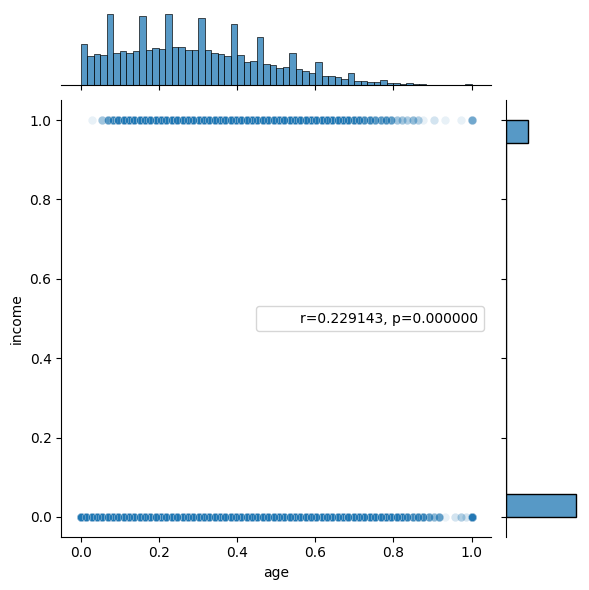

In [52]:
#marginal plot for provided data
#how is the training data distributed over a specific range of value
#Pearson correlation coefficient to interpret the linear relationship of these features with respect to the target
graph = sns.jointplot(data= data, x=X_train['age'], y=y_train, alpha = 0.1)
r, p = stats.pearsonr(X_train['age'], y_train)
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

<h4> Feature Scaling

In [53]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.50,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.387237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.575857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.25,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.161362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.241033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.506233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>4. Model training

In [54]:
# train a Gaussian Naive Bayes classifier on the training set
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

<h2> 5. Explainability

<h4> Directed Acyclic Graph

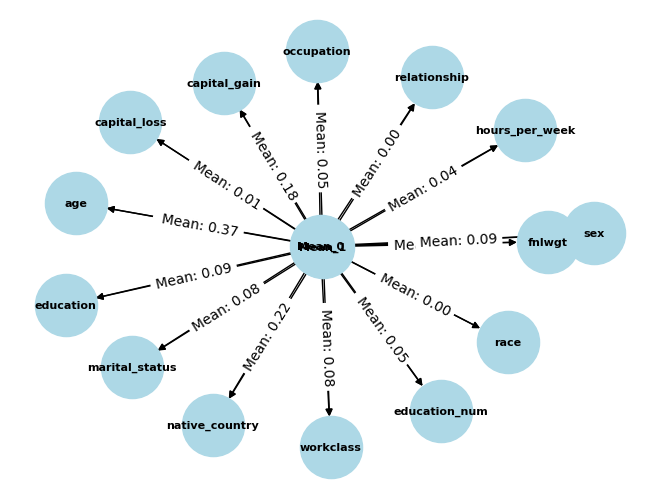

In [55]:
import networkx as nx

# Get mean for each feature and class
means = gnb.theta_

# Get feature names
feature_names = X.columns

# Create a directed graph using networkx
G = nx.DiGraph()

# Add nodes for features
for feature in feature_names:
    G.add_node(feature)

# Add edges based on conditional dependencies
for i, feature in enumerate(feature_names):
    for j, class_label in enumerate(['0', '1']):
        mean_label = f'Mean_{class_label}'
        G.add_node(mean_label)
        G.add_edge(mean_label, feature, label=f'Mean: {means[j, i]:.2f}')

# Visualize the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='lightblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


<h4> Directed Acyclic Graph with weighted mean score

Feature: native_country, Weighted Mean Absolute Score: 0.5742
Feature: fnlwgt, Weighted Mean Absolute Score: 0.5699
Feature: capital_gain, Weighted Mean Absolute Score: 0.4161
Feature: age, Weighted Mean Absolute Score: 0.3693
Feature: sex, Weighted Mean Absolute Score: 0.1888
Feature: education, Weighted Mean Absolute Score: 0.1720
Feature: workclass, Weighted Mean Absolute Score: 0.1368
Feature: marital_status, Weighted Mean Absolute Score: 0.1009
Feature: occupation, Weighted Mean Absolute Score: 0.0846
Feature: hours_per_week, Weighted Mean Absolute Score: 0.0838
Feature: education_num, Weighted Mean Absolute Score: 0.0748
Feature: capital_loss, Weighted Mean Absolute Score: 0.0426
Feature: relationship, Weighted Mean Absolute Score: 0.0006
Feature: race, Weighted Mean Absolute Score: 0.0002


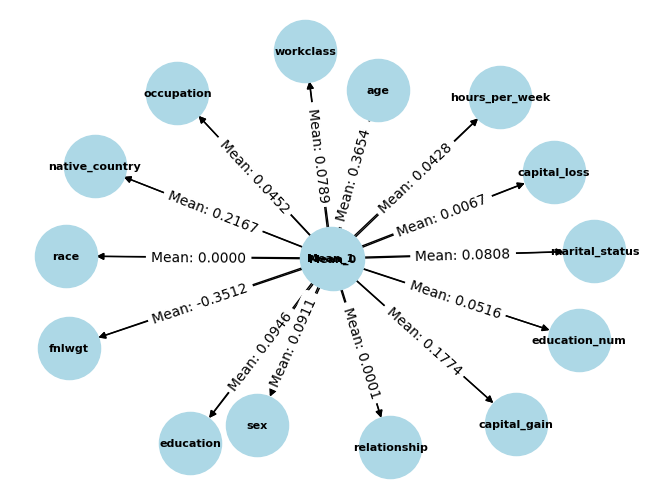

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Get mean for each feature and class
means = gnb.theta_

# Get feature names
feature_names = X.columns

# Create a directed graph using networkx
G = nx.DiGraph()

# Add nodes for features
for feature in feature_names:
    G.add_node(feature)

# Dictionary to store the weighted mean absolute score for each feature
weighted_mean_absolute_scores = {}

# Add edges based on conditional dependencies and calculate weighted mean absolute score for each feature
for i, feature in enumerate(feature_names):
    weighted_mean_absolute_score = 0.0
    for j, class_label in enumerate(['0', '1']):
        mean_label = f'Mean_{class_label}'
        G.add_node(mean_label)
        weight = means[j, i]  # Use the mean as the weight
        weighted_mean_absolute_score += np.abs(weight)  # Accumulate absolute weights
        G.add_edge(mean_label, feature, label=f'Mean: {means[j, i]:.4f}')

         # Reverse the direction of the arrow by swapping the order of nodes
        #G.add_edge(feature, mean_label, label=f'Mean: {means[j, i]:.4f}')

    # Store the weighted mean absolute score for the current feature
    weighted_mean_absolute_scores[feature] = weighted_mean_absolute_score

# Display the weighted mean absolute score for each feature in descending order
sorted_scores = sorted(weighted_mean_absolute_scores.items(), key=lambda x: x[1], reverse=True)
for feature, score in sorted_scores:
    print(f"Feature: {feature}, Weighted Mean Absolute Score: {score:.4f}")

# Visualize the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='lightblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

<h4> Bedingte Wahrscheinlichkeiten

In [57]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'data' contains the dataset

# Select the relevant features for the specific scenario
specific_data = pd.DataFrame({'education': ['Bachelors'], 'age': [20]})

# Convert column names to strings
specific_data.columns = specific_data.columns.astype(str)

# Combine specific data with the original dataset to ensure all categories are present
combined_data = pd.concat([data[['education', 'age']], specific_data])

# Use OneHotEncoder for categorical variables
encoder = OneHotEncoder(sparse=False)  # Use sparse=False to get a dense array
encoder.fit(combined_data)

# Transform the specific data into a DataFrame
specific_data_encoded = encoder.transform(specific_data)
column_names = encoder.get_feature_names_out(specific_data.columns)
specific_data_encoded_df = pd.DataFrame(specific_data_encoded, columns=column_names)

# Ensure that the number of features matches the model's expected input dimensions
if specific_data_encoded_df.shape[1] < 105:
    # Add additional zero-filled columns to match the expected number of features
    missing_columns = 105 - specific_data_encoded_df.shape[1]
    for i in range(missing_columns):
        specific_data_encoded_df[f'extra_feature_{i}'] = 0

# Calculate probabilities for the classes (assuming 'gnb' is already trained)
probabilities = gnb.predict_proba(specific_data_encoded_df)
print("Class probabilities as percentages:")
probabilities_percent = probabilities * 100
for class_idx, prob in enumerate(probabilities_percent[0]):
    print(f"Class {class_idx}: {prob:.2f}%")

Class probabilities as percentages:
Class 0: 100.00%
Class 1: 0.00%


/Users/fabian/anaconda3/envs/ex01/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/fabian/anaconda3/envs/ex01/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [58]:
# Assuming you have 'age' and 'sex' as features
new_data = pd.DataFrame({'age': [55], 'sex': ['Male']})  # Adjust the values accordingly

# Encoding categorical variables like 'sex' to numeric values
new_data['sex'] = new_data['sex'].map({'Male': 1, 'Female': 0})  # Assuming binary encoding

# If 'gnb' expects 105 features, you might need to create dummy features for the rest
all_features = pd.DataFrame()  # Create a DataFrame to hold all features

# Assuming there are other features named 'feature_3', 'feature_4', ..., 'feature_105'
for i in range(3, 106):
    all_features[f'feature_{i}'] = [0]  # Initialize all other features with 0

# Update 'age' and 'sex' in all_features with the provided values
all_features['age'] = new_data['age']
all_features['sex'] = new_data['sex']

# Predict the probabilities for the new_data instance
predicted_probabilities = gnb.predict_proba(all_features)

# Assuming your classes or labels are ['<=50K', '>50K']
classes = gnb.classes_

# Print the probabilities for each income category
for idx, label in enumerate(classes):
    print(f"Probability of {label} income: {predicted_probabilities[0][idx]}")


Probability of 0 income: 1.0
Probability of 1 income: 0.0


/var/folders/tr/h8hn7kys66z1mmrpy46rxvwh0000gn/T/ipykernel_28972/2317606151.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_features[f'feature_{i}'] = [0]  # Initialize all other features with 0
/var/folders/tr/h8hn7kys66z1mmrpy46rxvwh0000gn/T/ipykernel_28972/2317606151.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_features[f'feature_{i}'] = [0]  # Initialize all other features with 0
/var/folders/tr/h8hn7kys66z1mmrpy46rxvwh0000gn/T/ipykernel_28972/2317606151.py:12: PerformanceWarning: DataFrame is highly fra

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel o

<Figure size 800x600 with 0 Axes>

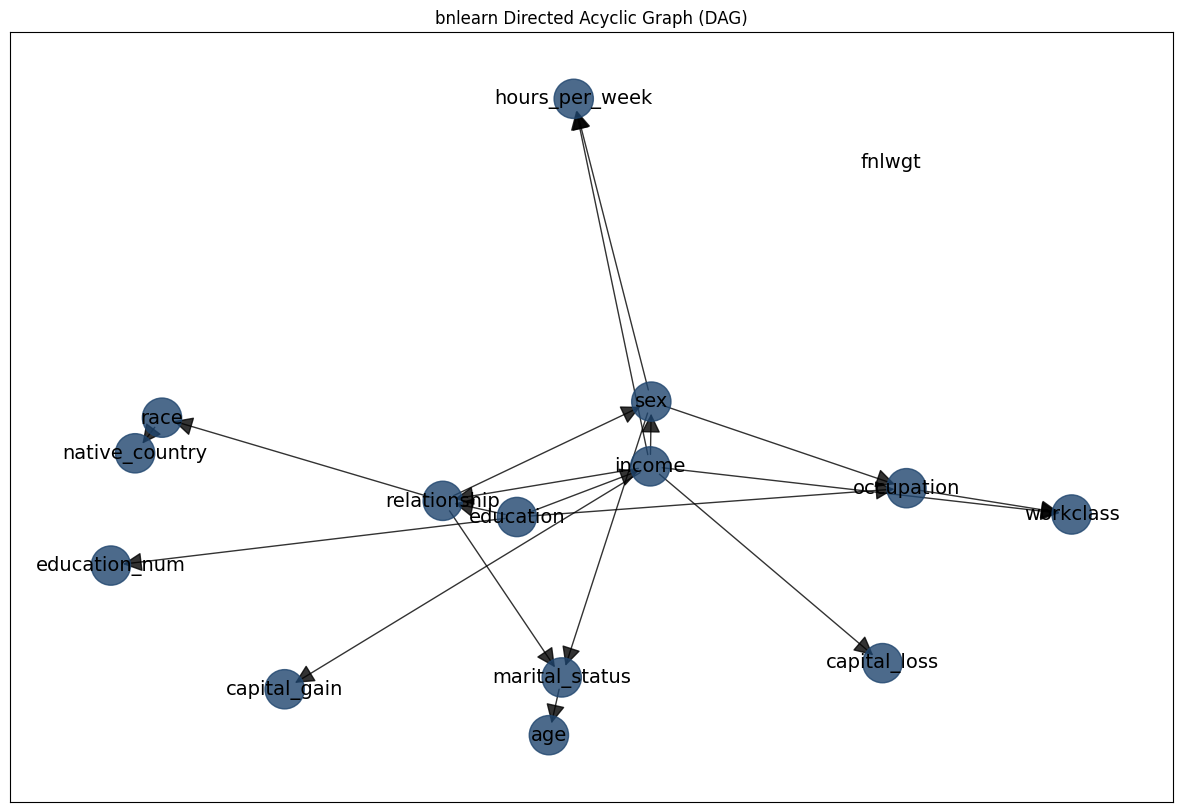

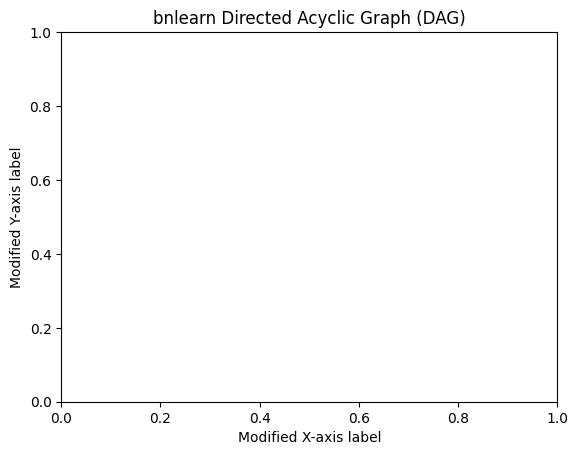

In [59]:
import bnlearn as bn
import matplotlib.pyplot as plt

# Assuming you have your data and trained DAG
DAG = bn.structure_learning.fit(data)
model_mle = bn.parameter_learning.fit(DAG, data, methodtype='maximumlikelihood')

# Plotting the DAG with modified axis labels and title
plt.figure(figsize=(8, 6))  # Define the figure size

# Plot the DAG
bn.plot(model_mle)

# Retrieve the current Axes object
ax = plt.gca()

ax.set_title('bnlearn Directed Acyclic Graph (DAG)')  # Set the title
ax.set_xlabel('Modified X-axis label')  # Set the modified X-axis label
ax.set_ylabel('Modified Y-axis label')  # Set the modified Y-axis label

plt.show()

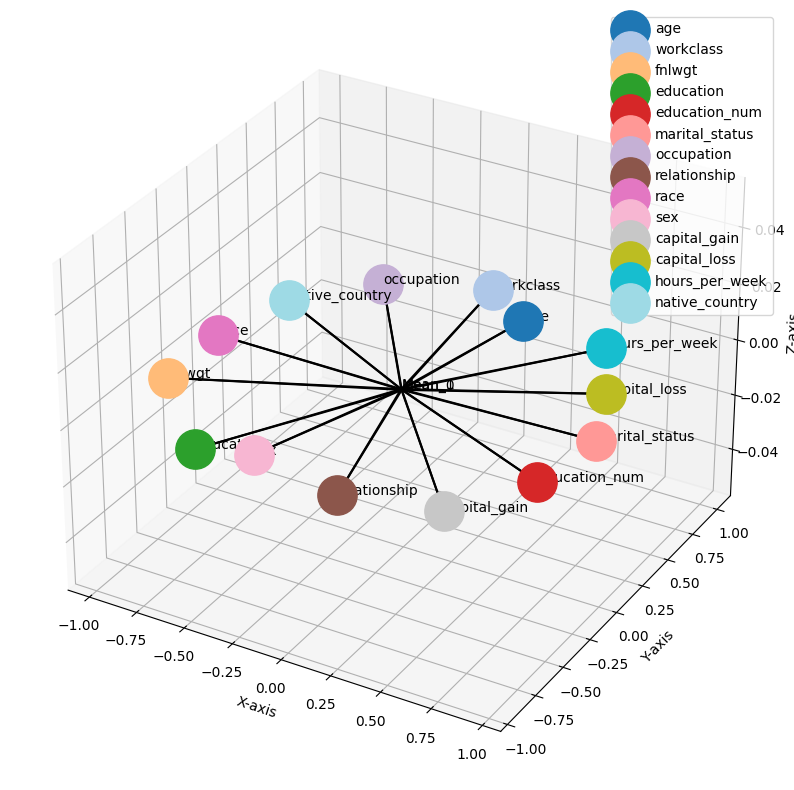

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import numpy as np

# Your existing code for creating the graph 'G'

# Assign arbitrary z-coordinates for 3D visualization
z_coords = {node: 0 for node in G.nodes()}  # Assigning a default value for z-coordinate (you may need to adjust this)

# Plotting in 3D
fig = plt.figure(figsize=(12, 10))  # Increase figure size
ax = fig.add_subplot(111, projection='3d')

# Get x, y, z coordinates for nodes
nodes = G.nodes()
feature_nodes = [node for node in nodes if isinstance(node, str) and 'Mean' not in node]

# Create a colormap to generate distinct colors for each feature
colormap = plt.cm.get_cmap('tab20', len(feature_nodes))

# Plot nodes with different colors for each feature
for idx, node in enumerate(feature_nodes):
    color = colormap(idx)
    ax.scatter(pos[node][0], pos[node][1], z_coords[node], color=color, s=800, label=node)  # Increase marker size

# Plot edges
for edge in G.edges():
    ax.plot([pos[edge[0]][0], pos[edge[1]][0]], [pos[edge[0]][1], pos[edge[1]][1]], [z_coords[edge[0]], z_coords[edge[1]]], 'k-')

# Add labels
for node in nodes:
    ax.text(pos[node][0], pos[node][1], z_coords[node], node, color='black', fontsize=10)  # Increase label font size

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.legend()
plt.show()

In [61]:
# Assuming you have 'age' and 'sex' as features
new_data = pd.DataFrame({'age': [25], 'sex': ['Female']})  # Adjust the values accordingly

# Encoding categorical variables like 'sex' to numeric values
new_data['sex'] = new_data['sex'].map({'Male': 0, 'Female': 1})  # Assuming binary encoding

# If 'gnb' expects 105 features, create dummy features for the rest
all_features = pd.DataFrame()

for i in range(3, 106):
    all_features[f'feature_{i}'] = [0]  # Initialize all other features with 0

# Update 'age' and 'sex' in all_features with the provided values
all_features['age'] = new_data['age']
all_features['sex'] = new_data['sex']

# Predict the probabilities for the new_data instance
predicted_probabilities = gnb.predict_proba(all_features)

# Assuming your classes or labels are ['<=50K', '>50K']
classes = gnb.classes_

# Print the probabilities for each income category
for idx, label in enumerate(classes):
    print(f"Probability of {label} income: {predicted_probabilities[0][idx]}")


Probability of 0 income: 1.0
Probability of 1 income: 0.0


<h4>Feature Importance

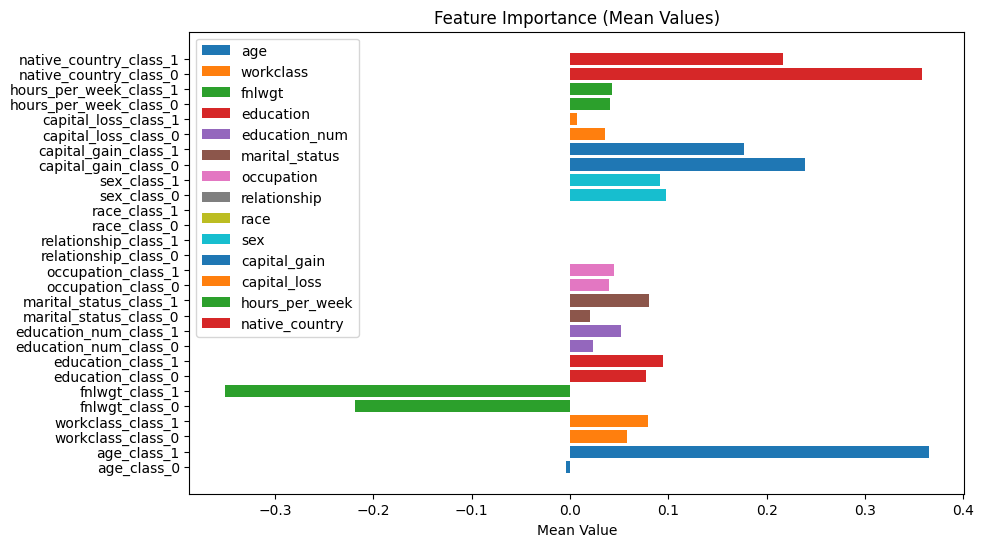

In [62]:
# Get mean for each feature and class
means = gnb.theta_

# Get feature names
feature_names = X.columns

# Plot the mean values
plt.figure(figsize=(10, 6))
for i, feature in enumerate(feature_names):
    plt.barh([f'{feature}_class_0', f'{feature}_class_1'], means[:, i], label=feature)

plt.xlabel('Mean Value')
plt.title('Feature Importance (Mean Values)')
plt.legend()
plt.show()

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


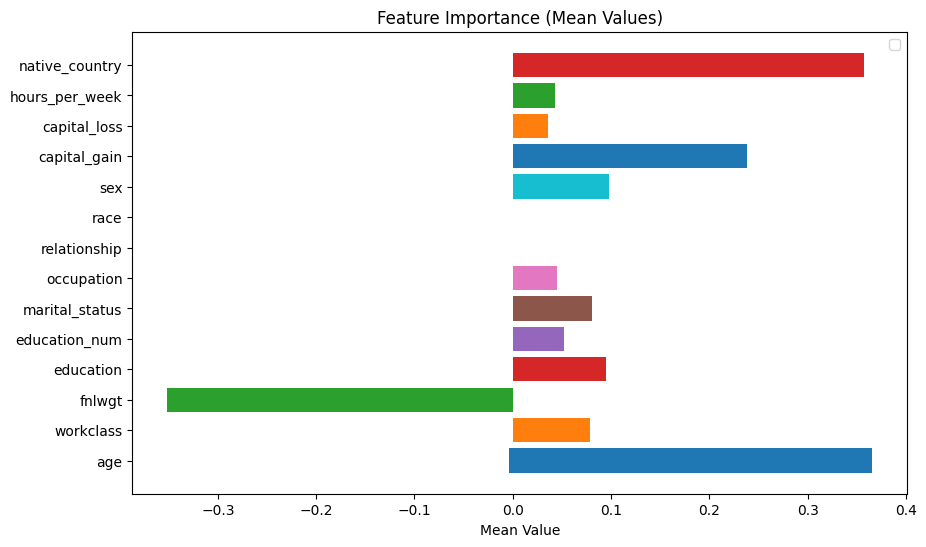

In [63]:
# Get mean for each feature and class
means = gnb.theta_

# Get feature names
feature_names = X.columns

# Plot the mean values
plt.figure(figsize=(10, 6))
for i, feature in enumerate(feature_names):
    plt.barh(feature, means[:, i])

plt.xlabel('Mean Value')
plt.title('Feature Importance (Mean Values)')
plt.legend()
plt.show()

<h4>Partial Dependence Plots (PDPs)

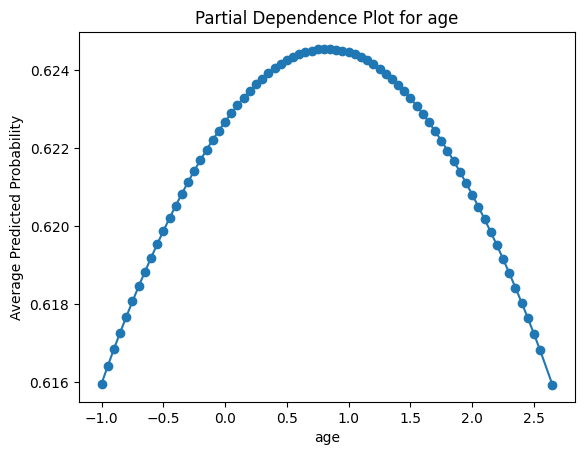

In [64]:
feature_name = 'age'

# Create the PDP
unique_values = np.unique(X_test[feature_name])
pdp_values = []

for value in unique_values:
    X_pdp = X_test.copy()
    X_pdp[feature_name] = value
    pdp_values.append(gnb.predict_proba(X_pdp)[:, 1].mean())

# Plot the PDP
plt.plot(unique_values, pdp_values, marker='o')
plt.xlabel(feature_name)
plt.ylabel('Average Predicted Probability')
plt.title(f'Partial Dependence Plot for {feature_name}')
plt.show()

<h2>6. Predictions and Evaluations

In [65]:
# Performance Evaluation
# Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
TP = np.sum(income) 
# Specific to the naive case
FP = income.count() - TP
# No predicted negatives in the naive case
TN = 0 
FN = 0 

# Calculate accuracy, precision and recall
accuracy = TP / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * ((precision * recall) / ((beta**2) * precision + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2393, F-score: 0.2822]


<h4> Predict the results

In [66]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

<h4> Check accuracy score

In [67]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.5853


In [68]:
# compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.5922


In [69]:
# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.5922
Test set score: 0.5853


In [70]:
# Compare model accuracy with null accuracy
# check class distribution in test set
y_test.value_counts()

0    11138
1     3515
Name: income, dtype: int64

In [71]:
# Make predictions using the model
predictions = (gnb.fit(X_train, y_train)).predict(X_test)

# Report accuracy and fscore
print("Accuracy score on testing data {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))

Accuracy score on testing data 0.5853
F-score on testing data: 0.4096


<h4> Confusion matrix

In [72]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5307 5831]
 [ 245 3270]]

True Positives(TP) =  5307

True Negatives(TN) =  3270

False Positives(FP) =  5831

False Negatives(FN) =  245


<Axes: >

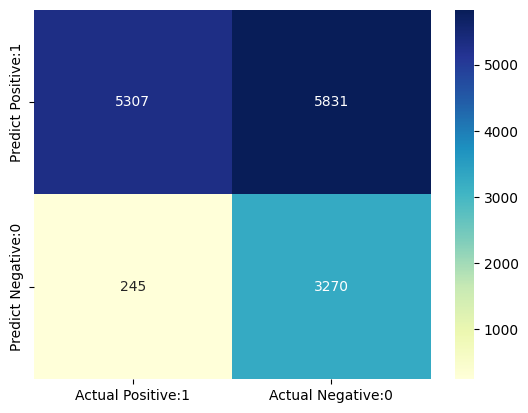

In [73]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<h4> Classification metrices

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.48      0.64     11138
           1       0.36      0.93      0.52      3515

    accuracy                           0.59     14653
   macro avg       0.66      0.70      0.58     14653
weighted avg       0.81      0.59      0.61     14653



In [75]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.5853


In [76]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.4147


<h4> Class probabilities

In [77]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

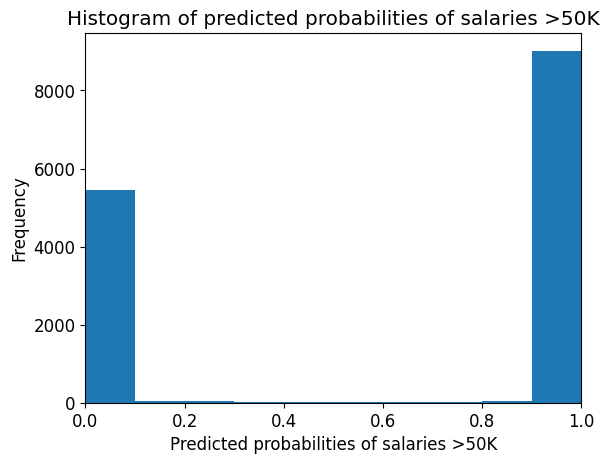

In [78]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [79]:
# Combine X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, pd.Series(y_train, name='Target')], axis=1)
# Calculate standard deviations for each feature and class
std_devs = train_data.groupby('Target').std()
# Print the standard deviations
print("Standard Deviations:")
print(std_devs)

Standard Deviations:
          (age,)  (workclass_1,)  (workclass_2,)  (workclass_3,)  \
Target                                                             
0.0     0.692514        0.240705        0.432969        0.274793   
1.0     0.689147        0.248033        0.435165        0.269014   

        (workclass_4,)  (workclass_5,)  (workclass_6,)  (workclass_7,)  \
Target                                                                   
0.0           0.172759        0.181876        0.196638        0.019598   
1.0           0.166969        0.187408        0.203966        0.022978   

        (workclass_8,)  (fnlwgt,)  ...  (native_country_32,)  \
Target                             ...                         
0.0           0.012831   0.872279  ...              0.016564   
1.0           0.013269   0.882701  ...              0.000000   

        (native_country_33,)  (native_country_34,)  (native_country_35,)  \
Target                                                                     


<h2> 7. Hyperparametertuning

In [80]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [81]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [82]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [83]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')


gs_NB.fit(X_train, y_train);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.1873817422860384}

In [ ]:
gs_NB.best_score_

0.81848930917714

In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

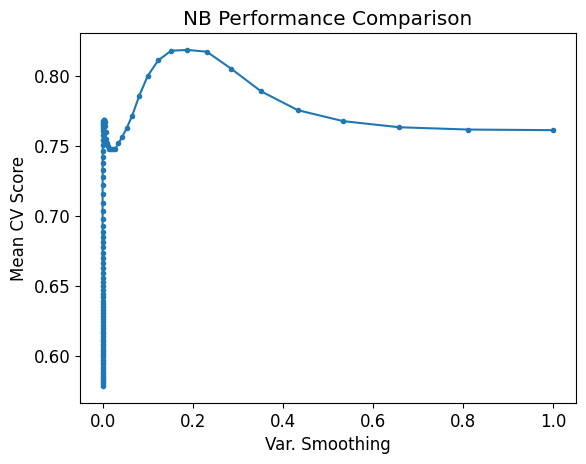

In [ ]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

<h2> 8. Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
result = []
param_distribution = {'var_smoothing': np.logspace(0, -9, num=100)}
scoring = 'accuracy'  

for i in range(1, 13):
    # PCA durchführen
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    
    # RandomizedSearchCV für den Naive Bayes Classifier
    search_cv = RandomizedSearchCV(GaussianNB(), param_distribution, scoring=scoring, n_jobs=-1,
                                   cv=StratifiedKFold(n_splits=10, shuffle=True), refit=scoring)
    search_cv.fit(X_train_pca, y_train)
    best_model = search_cv.best_estimator_

    # Testdaten transformieren
    X_test_pca = pca.transform(X_test)
    
    # Vorhersagen
    y_pred = best_model.predict(X_test_pca)
    
    # Modellbewertung
    f1 = fbeta_score(y_test, y_pred, beta=1, pos_label=1)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{i} {acc} {f1}")
    
    # Ergebnisse speichern
    result.append((i, acc, f1, pca, best_model))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
# Finde den Index der Zeile mit der höchsten Genauigkeit
best_index = np.argmax(np.array(result)[:, 1])

# Extrahiere die Informationen für die beste Zeile
best_row = result[best_index]

# Extrahiere die Anzahl der Hauptkomponenten und die PCA-Objekt
best_components_count = best_row[0]
best_pca = best_row[3]

# Extrahiere die Namen der drei Hauptkomponenten mit den höchsten Ladevektoren (Betrag)
top_indices = np.argsort(np.abs(best_pca.components_))[:, -3:]
top_feature_names = X_train.columns[top_indices.flatten()]

# Gib die Informationen aus
print("Beste Zeile mit höchster Genauigkeit:")
print(f"Anzahl der Hauptkomponenten: {best_components_count}")
print(f"Namen der Hauptkomponenten mit höchstem Betrag der Ladevektoren:")
print(top_feature_names)
print(f"Genauigkeit: {best_row[1]}")
print(f"F1-Score: {best_row[2]}")

Beste Zeile mit höchster Genauigkeit:
Anzahl der Hauptkomponenten: 7
Namen der Hauptkomponenten mit höchstem Betrag der Ladevektoren:
MultiIndex([(   'education_num',),
            (  'relationship_2',),
            (  'hours_per_week',),
            ('marital_status_1',),
            (             'age',),
            (   'education_num',),
            ('marital_status_1',),
            (  'relationship_2',),
            (   'education_num',),
            (  'relationship_2',),
            (   'education_num',),
            (          'fnlwgt',),
            (           'sex_1',),
            (           'sex_2',),
            (             'age',),
            (           'sex_1',),
            (           'sex_2',),
            (  'relationship_3',),
            (   'education_num',),
            (     'education_1',),
            (     'education_4',)],
           )
Genauigkeit: 0.8218794786050638
F1-Score: 0.5861084681255947


In [ ]:
# Extrahiere die eindeutigen Namen der Merkmale
unique_feature_names = set([name[0] for name in top_feature_names])

# Gib die eindeutigen Namen der Merkmale aus
print("Eindeutige Namen der Hauptkomponenten:")
print(unique_feature_names)

Eindeutige Namen der Hauptkomponenten:
{'relationship_2', 'fnlwgt', 'sex_2', 'age', 'education_1', 'sex_1', 'relationship_3', 'hours_per_week', 'education_4', 'marital_status_1', 'education_num'}


In [ ]:
# Loadings Matrix für die ersten drei Hauptkomponenten
loadings_matrix = pca.components_

# Drucke die Loadings Matrix
print("Loadings Matrix:")
print(loadings_matrix)

Loadings Matrix:
[[ 2.55250985e-02  1.22304138e-03 -2.23390327e-02 ...  8.95934056e-06
  -3.81743720e-05 -1.10843228e-06]
 [-4.14009298e-01 -2.37556877e-02  1.27551858e-01 ... -1.42403550e-04
  -2.07704478e-04  1.72563167e-05]
 [ 1.98359863e-01 -2.32884211e-02  3.27047516e-02 ...  1.16298643e-04
  -1.49335107e-04 -2.59421728e-05]
 ...
 [ 1.01066671e-01  2.90113863e-02 -5.19149468e-03 ...  4.74946425e-04
   3.62096958e-04  1.50489687e-05]
 [ 1.99087906e-01  6.21279157e-03  1.10767851e-01 ... -1.49234317e-04
  -5.01266818e-04  7.45251085e-06]
 [ 4.19014514e-01 -9.30849806e-02  1.01589345e-01 ...  6.34696421e-04
   1.26823177e-04  4.55339381e-05]]


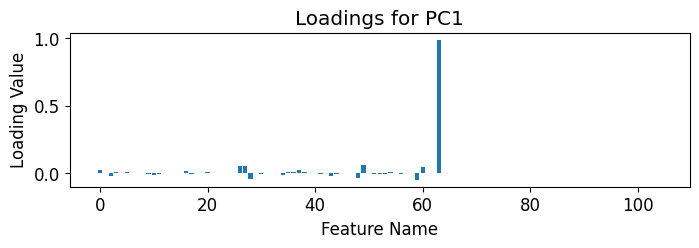

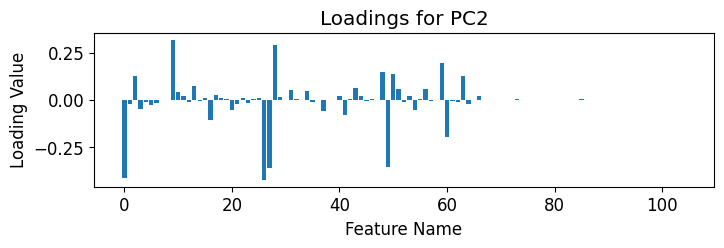

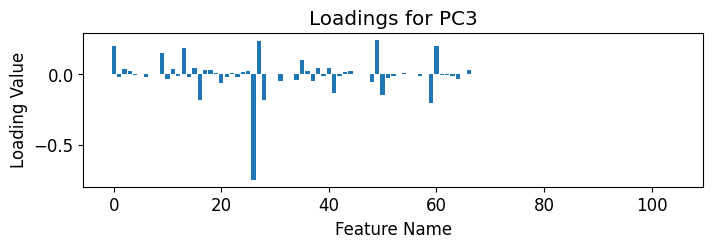

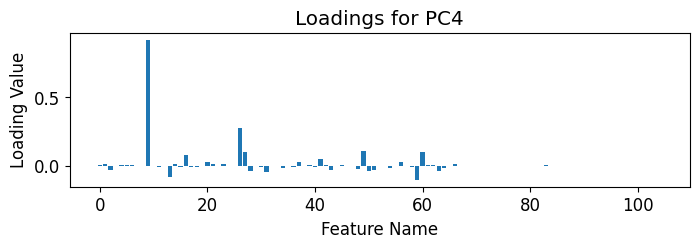

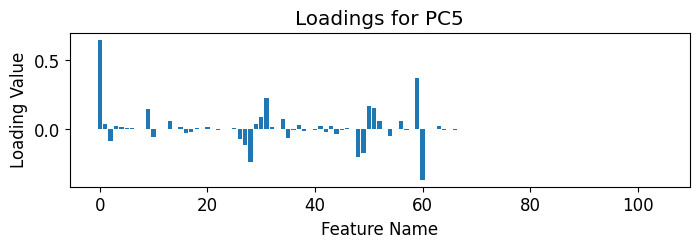

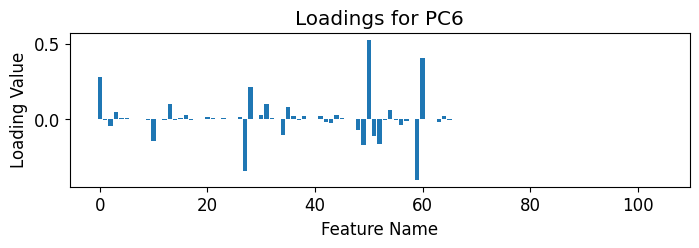

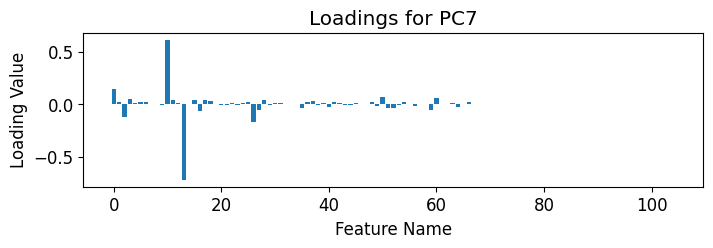

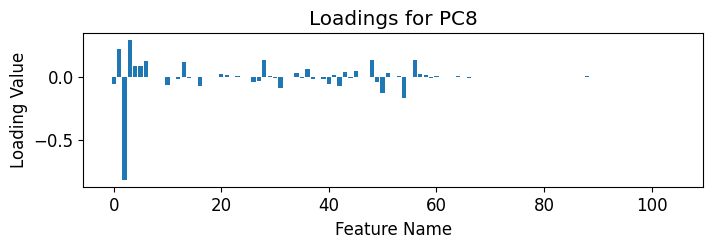

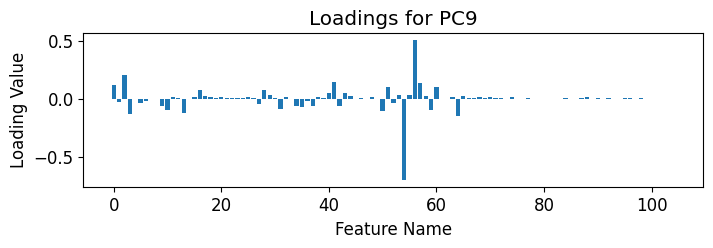

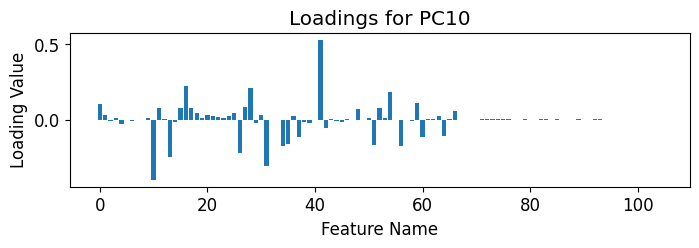

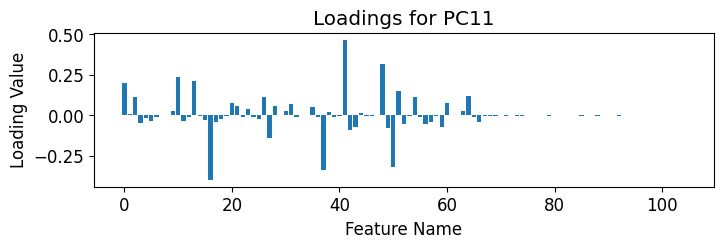

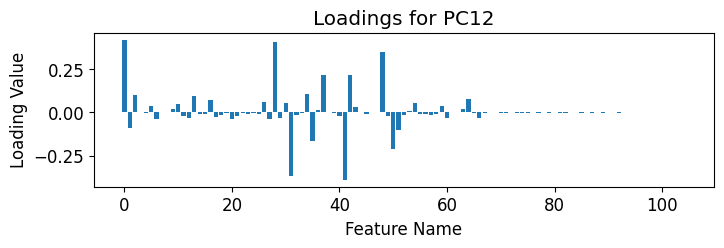

In [ ]:
# Plot für jede Hauptkomponente
for i in range(loadings_matrix.shape[0]):
    plt.figure(figsize=(8, 2))
    plt.bar(range(len(loadings_matrix[i])), loadings_matrix[i])
    plt.title(f'Loadings for PC{i+1}')
    plt.xlabel('Feature Name')
    plt.ylabel('Loading Value')
    plt.show()